<a href="https://colab.research.google.com/github/NastyaParnet/evolution/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from random import random
import matplotlib.pyplot as plt
import math
import time

def normalRandom(min, max, skew):
    u = 0
    v = 0
    while u == 0: 
      u = random()
    while v == 0: 
      v = random()
    num = math.sqrt(-2.0 * math.log(u)) * math.cos(2.0 * math.pi * v)
    num = num / 10.0 + 0.5
    if num > 1 or num < 0: 
      num = normalRandom(min, max, skew)
    else:
        num = math.pow(num, skew)
        num *= max - min
        num += min
    return num

def initializePopulation (n, minX, maxX, minY, maxY): 
    population = []
    for i in range(n):
        randomX = random() * (maxX-minX) + minX
        randomY = random() * (maxY-minY) + minY
        population.append([randomX, randomY])
    return population

def generateHeirs(population, n, fitnessFunction):
    PTest = []
    for i in range(len(population)):
        SLX = 0
        SRX = 0
        MLX = 0
        MRX = 0
        SLY = 0
        SRY = 0
        MLY = 0
        MRY = 0
        for j in range(n):
            xji = normalRandom(population[i][0]-1, population[i][0]+1, 1)
            yji = normalRandom(population[i][1]-1, population[i][1]+1, 1)
            if xji < population[i][0]:
                SLX += xji
                MLX += 1
            else:
                SRX += xji
                MRX += 1
            if yji < population[i][1]:
                SLY += yji
                MLY += 1
            else:
                SRY += yji
                MRY += 1
        xL = (1 / (MLX if MLX else 1)) * SLX
        xR = (1 / (MRX if MRX else 1)) * SRX
        yL = (1 / (MLY if MLY else 1)) * SLY
        yR = (1 / (MRY if MRY else 1)) * SRY

        yForXL = yL if fitnessFunction(xL, yL) < fitnessFunction(xL, yR) else yR
        yForXR = yL if fitnessFunction(xR, yL) < fitnessFunction(xR, yR) else yR
        xyH = [xL, yForXL] if fitnessFunction(xL, yForXL) < fitnessFunction(xR, yForXR) else [xR, yForXR]
        PTest.append(xyH)
    return PTest

def start(n, minX, maxX, minY, maxY, numberIteration, fitnessFunction):
    dataSet = []
    population = initializePopulation(n, minX, maxX, minY, maxY)
    for i in range(numberIteration):
        bestIndividual = population[0]
        bestValue = fitnessFunction(bestIndividual[0], bestIndividual[1])
        for i in range(len(population)):
            currentValue = fitnessFunction(population[i][0], population[i][1])
            if currentValue < bestValue:
                bestIndividual = population[i]
                bestValue = currentValue
        dataSet.append([bestIndividual, bestValue])
        population = generateHeirs(population, n, fitnessFunction)
    return dataSet

--- 0.28975367546081543 seconds ---


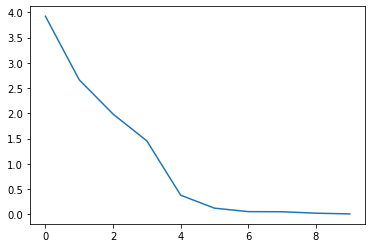

[[-0.38117649500943784, 3.7922474673301902], 3.9226541584305528]


In [ ]:
n = 100
minX = -10
maxX = 10
minY = -10
maxY = 10
numberIteration = 10

def buta(x, y):
    return (x + 2 * y - 7)**2 + (2 * x + y - 5)**2

def bucina(x, y):
    return 100*math.sqrt(abs(y-0.01*x*x)) + 0.01*abs(x+10)

def maccormik(x, y):
    return math.sin(x+y)+(x-y)**2-1.5*x+2.5*y+1

def funcForSort(elem):
  return elem[1]

start_time = time.time()
dataSet = start(n, minX, maxX, minY, maxY, numberIteration, buta)
print("--- %s seconds ---" % (time.time() - start_time))
plt.plot([x[1] for x in dataSet])
plt.show() 
dataSet.sort(key=funcForSort, reverse=True)
print(dataSet[0])
